In [3]:
import pandas as pd
# 파일 경로
file_path = 'data_1145_20231118.csv'

# 파일을 다른 인코딩으로 읽기 시도 (cp949)
try:
    df = pd.read_csv(file_path, encoding='cp949')
except UnicodeDecodeError:
    # cp949로도 실패할 경우 euc-kr로 시도
    df = pd.read_csv(file_path, encoding='euc-kr')

# 종목코드만 추출하여 새 DataFrame 생성
stock_codes_df = df[['종목코드']]  # '종목코드' 열만 선택

# 새로운 CSV 파일로 저장
new_file_path = 'stock_codes.csv'
stock_codes_df.to_csv(new_file_path, index=False)

In [6]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller
import subprocess
import time
from selenium.webdriver.common.by import By
import random
from selenium.common.exceptions import NoSuchElementException
import csv
from selenium.common.exceptions import NoSuchElementException, TimeoutException, StaleElementReferenceException

# 크롬 디버거로 크롬 구동
subprocess.Popen(r'C:\Program Files\Google\Chrome\Application\chrome.exe --remote-debugging-port=9222 --user-data-dir="C:\chrometemp"')
time.sleep(3)  # 크롬이 완전히 실행될 때까지 대기

# 웹드라이버 설정
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
driver_path = 'C:\\Users\\USER\\Downloads\\chromedriver_win32\\chromedriver.exe'
option = Options()
option.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

try:
    driver = webdriver.Chrome(driver_path, options=option)
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(driver_path, options=option)

driver.implicitly_wait(5)  # 웹 자원 로드를 위해 5초까지 기다림

data = pd.read_csv('stock_codes.csv')

# 테스트를 위한 종목코드 리스트 (처음 10개)
stock_codes = data['종목코드'].tolist()
# CSV 파일 준비
with open('stock_beta_final.csv', 'w', newline='', encoding='utf-8-sig') as file:
    writer = csv.writer(file)
    writer.writerow(['종목코드', '종목명', '베타'])

    for code in stock_codes:
        # 종목 페이지로 이동
        url = f'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={code}'
        driver.get(url)

        try:
            # WebDriverWait를 사용하여 종목명 요소가 로드될 때까지 최대 10초간 기다림
            wait = WebDriverWait(driver, 10)
            name_xpath = '//*[@id="pArea"]/div[1]/div/table/tbody/tr[1]/td/dl/dt[1]/span'
            stock_name = wait.until(EC.visibility_of_element_located((By.XPATH, name_xpath))).text.strip()

            # WebDriverWait를 사용하여 베타값 요소가 로드될 때까지 최대 10초간 기다림
            beta_xpath = '//*[@id="cTB11"]/tbody/tr[6]/td'
            beta_value = wait.until(EC.visibility_of_element_located((By.XPATH, beta_xpath))).text.strip()

            # CSV 파일에 쓰기
            writer.writerow([code, stock_name, beta_value])

        except (NoSuchElementException, TimeoutException, StaleElementReferenceException):
            print(f"{code} 종목에서 데이터를 찾을 수 없습니다.")
            continue

278990 종목에서 데이터를 찾을 수 없습니다.
343090 종목에서 데이터를 찾을 수 없습니다.
112190 종목에서 데이터를 찾을 수 없습니다.
260870 종목에서 데이터를 찾을 수 없습니다.
296520 종목에서 데이터를 찾을 수 없습니다.
183410 종목에서 데이터를 찾을 수 없습니다.
076340 종목에서 데이터를 찾을 수 없습니다.
243870 종목에서 데이터를 찾을 수 없습니다.
456700 종목에서 데이터를 찾을 수 없습니다.
244880 종목에서 데이터를 찾을 수 없습니다.
288490 종목에서 데이터를 찾을 수 없습니다.
257990 종목에서 데이터를 찾을 수 없습니다.
317860 종목에서 데이터를 찾을 수 없습니다.
283100 종목에서 데이터를 찾을 수 없습니다.
229500 종목에서 데이터를 찾을 수 없습니다.
323350 종목에서 데이터를 찾을 수 없습니다.
178600 종목에서 데이터를 찾을 수 없습니다.
114920 종목에서 데이터를 찾을 수 없습니다.
302920 종목에서 데이터를 찾을 수 없습니다.
199150 종목에서 데이터를 찾을 수 없습니다.
227420 종목에서 데이터를 찾을 수 없습니다.
176750 종목에서 데이터를 찾을 수 없습니다.
163430 종목에서 데이터를 찾을 수 없습니다.
403360 종목에서 데이터를 찾을 수 없습니다.
092590 종목에서 데이터를 찾을 수 없습니다.
179720 종목에서 데이터를 찾을 수 없습니다.
238500 종목에서 데이터를 찾을 수 없습니다.
223220 종목에서 데이터를 찾을 수 없습니다.
162120 종목에서 데이터를 찾을 수 없습니다.
253610 종목에서 데이터를 찾을 수 없습니다.
448780 종목에서 데이터를 찾을 수 없습니다.
200580 종목에서 데이터를 찾을 수 없습니다.
233250 종목에서 데이터를 찾을 수 없습니다.
236340 종목에서 데이터를 찾을 수 없습니다.
322970 종목에서 데이터를 찾을 수 없습니다.
208890 종목에서 데이터를 찾을 

In [7]:
beta_list = pd.read_csv('stock_beta_final.csv')

In [17]:
df_sorted = beta_list.sort_values(by='베타', ascending=False)


In [27]:
df_sorted = df_sorted[df_sorted['베타'] != 0]

In [36]:
# 베타값이 1보다 큰 행들을 필터링
more_than_one = df_sorted[df_sorted['베타'] > 1]

# 필터링된 행들의 개수 세기
count_more_than_one = len(more_than_one)

count_more_than_one

766

In [37]:
# 베타값이 2보다 크고 3보다 작은 행들을 필터링
more_than_two_less_than_three = df_sorted[(df_sorted['베타'] > 2) & (df_sorted['베타'] < 3)]

# 필터링된 행들의 개수 세기
count_more_than_two_less_than_three = len(more_than_two_less_than_three)

count_more_than_two_less_than_three


54

In [39]:
more_than_two_less_than_three

,종목코드,종목명,베타
2209,073640,테라사이언스,2.94
827,254490,미래반도체,2.91
906,338220,뷰노,2.88
908,406820,뷰티스킨,2.81
272,465770,STX그린로지스,2.81
690,079810,디이엔티,2.81
1687,010600,웰바이오텍,2.78
1961,462520,조선내화,2.77
1997,270520,지오릿에너지,2.74
1047,042600,새로닉스,2.70


In [40]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import chromedriver_autoinstaller
import subprocess
import time
from selenium.webdriver.common.by import By
import random
from selenium.common.exceptions import NoSuchElementException
import csv
from selenium.common.exceptions import NoSuchElementException, TimeoutException, StaleElementReferenceException

# 크롬 디버거로 크롬 구동
subprocess.Popen(r'C:\Program Files\Google\Chrome\Application\chrome.exe --remote-debugging-port=9222 --user-data-dir="C:\chrometemp"')
time.sleep(3)  # 크롬이 완전히 실행될 때까지 대기

# 웹드라이버 설정
chrome_ver = chromedriver_autoinstaller.get_chrome_version().split('.')[0]
driver_path = 'C:\\Users\\USER\\Downloads\\chromedriver_win32\\chromedriver.exe'
option = Options()
option.add_experimental_option("debuggerAddress", "127.0.0.1:9222")

try:
    driver = webdriver.Chrome(driver_path, options=option)
except:
    chromedriver_autoinstaller.install(True)
    driver = webdriver.Chrome(driver_path, options=option)

driver.implicitly_wait(5)  # 웹 자원 로드를 위해 5초까지 기다림


In [45]:

data = pd.read_csv('filtered_stock_codes.csv')

# 테스트를 위한 종목코드 리스트 (처음 10개)
stock_codes = data['종목코드'].tolist()[:10]
# CSV 파일 준비
with open('stock_beta_final.csv', 'w', newline='', encoding='utf-8-sig') as file:
    writer = csv.writer(file)
    writer.writerow(['종목코드', '종목명', 'PER', '업종PER', '상대가치평가(PER)'])

    for code in stock_codes:
        # 종목 페이지로 이동
        url = f'https://navercomp.wisereport.co.kr/v2/company/c1010001.aspx?cmp_cd={code}'
        driver.get(url)

        try:
            # WebDriverWait를 사용하여 종목명 요소가 로드될 때까지 최대 10초간 기다림
            wait = WebDriverWait(driver, 10)
            name_xpath = '//*[@id="pArea"]/div[1]/div/table/tbody/tr[1]/td/dl/dt[1]/span'
            stock_name = wait.until(EC.visibility_of_element_located((By.XPATH, name_xpath))).text.strip()

            # WebDriverWait를 사용하여 PER 요소가 로드될 때까지 최대 10초간 기다림
            wait = WebDriverWait(driver, 10)
            per_xpath = '//*[@id="pArea"]/div[1]/div/table/tbody/tr[3]/td/dl/dt[3]/b'
            stock_per = wait.until(EC.visibility_of_element_located((By.XPATH, per_xpath))).text.strip()
            stock_per = float(stock_per)

            # WebDriverWait를 사용하여 업종PER 요소가 로드될 때까지 최대 10초간 기다림
            sector_per = '//*[@id="pArea"]/div[1]/div/table/tbody/tr[3]/td/dl/dt[4]/b'
            stock_sector_per = wait.until(EC.visibility_of_element_located((By.XPATH, sector_per))).text.strip()
            stock_sector_per = float(stock_sector_per)

            #PER/업종PER, 상대가치평가
            co_value = stock_per/stock_sector_per

            # CSV 파일에 쓰기
            writer.writerow([code, stock_name, stock_per, stock_sector_per, co_value])

        except (NoSuchElementException, TimeoutException, StaleElementReferenceException):
            print(f"{code} 종목에서 데이터를 찾을 수 없습니다.")
            continue

ValueError: could not convert string to float: 'N/A'

In [ ]:
# ... 이전 코드 ...

for code in stock_codes:
    # 종목 페이지로 이동
    # ...

    try:
        # ... 종목명 추출 코드 ...

        # PER 값 추출
        per_xpath = '//*[@id="pArea"]/div[1]/div/table/tbody/tr[3]/td/dl/dt[3]/b'
        stock_per_text = wait.until(EC.visibility_of_element_located((By.XPATH, per_xpath))).text.strip()

        # 업종PER 값 추출
        sector_per_xpath = '//*[@id="pArea"]/div[1]/div/table/tbody/tr[3]/td/dl/dt[4]/b'
        stock_sector_per_text = wait.until(EC.visibility_of_element_located((By.XPATH, sector_per_xpath))).text.strip()

        # PER 또는 업종PER 값이 'N/A'인 경우 처리
        if stock_per_text == 'N/A' or stock_sector_per_text == 'N/A':
            writer.writerow([code, stock_name, 'X', 'X', 'X'])
            continue

        # 실수로 변환
        stock_per = float(stock_per_text)
        stock_sector_per = float(stock_sector_per_text)

        # 상대가치평가 계산
        co_value = stock_per / stock_sector_per

        # CSV 파일에 쓰기
        writer.writerow([code, stock_name, stock_per, stock_sector_per, co_value])

    except (NoSuchElementException, TimeoutException, StaleElementReferenceException):
        print(f"{code} 종목에서 데이터를 찾을 수 없습니다.")
        continue


C:\Users\USER\AppData\Roaming\Python\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


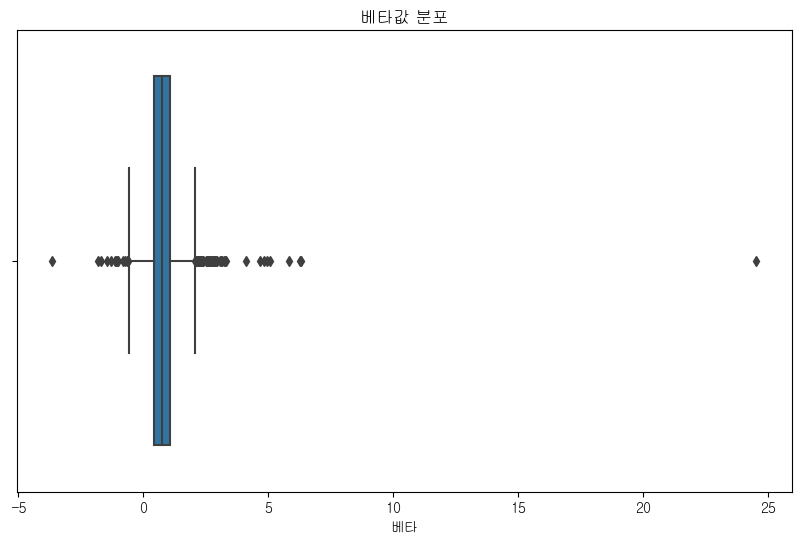

count    2603.000000
mean        0.799735
std         0.766364
min        -3.660000
25%         0.420000
50%         0.740000
75%         1.080000
max        24.530000
Name: 베타, dtype: float64

In [16]:
# 베타가 0인 값 삭제 및 이상치 확인을 위한 작업

# 파일 경로
csv_path = 'stock_beta_final.csv'

# CSV 파일 읽기
df = pd.read_csv(csv_path)

# 베타가 0인 행 제거
df = df[df['베타'] != 0]

# 베타값의 기술통계 및 이상치 확인을 위한 박스플롯 생성
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 베타값에 대한 기술통계 요약
desc_stats = df['베타'].describe()

# 박스플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['베타'])
plt.title("베타값 분포")
plt.show()

desc_stats

